<a href="https://colab.research.google.com/github/31satoshi04/chainerTutoral/blob/master/basechainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import chainer
from sklearn.datasets import load_iris
x, t = load_iris(return_X_y=True)

x = x.astype('float32')
t = t.astype('int32')

from sklearn.model_selection import train_test_split

#  テストデータセット
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
# 訓練・検証データセット
x_train, x_val, t_train, t_val = train_test_split(x_train_val,t_train_val,test_size=0.3, random_state=0)


print("x:",x.shape)
print("t:",t.shape)


x: (150, 4)
t: (150,)


epoch: 0, iteration: 5, loss (train): 1.8947, loss (valid): 0.4534
epoch: 1, iteration: 10, loss (train): 1.1368, loss (valid): 0.4534
epoch: 2, iteration: 15, loss (train): 1.0963, loss (valid): 0.4534
epoch: 3, iteration: 20, loss (train): 1.0852, loss (valid): 0.4534
epoch: 4, iteration: 25, loss (train): 1.0068, loss (valid): 0.4534
epoch: 5, iteration: 30, loss (train): 0.9679, loss (valid): 0.4534
epoch: 6, iteration: 35, loss (train): 0.9521, loss (valid): 0.4534
epoch: 7, iteration: 40, loss (train): 0.9198, loss (valid): 0.4534
epoch: 8, iteration: 45, loss (train): 0.9264, loss (valid): 0.4534
epoch: 9, iteration: 50, loss (train): 0.9077, loss (valid): 0.4534
epoch: 10, iteration: 55, loss (train): 0.8955, loss (valid): 0.4534
epoch: 11, iteration: 60, loss (train): 0.8918, loss (valid): 0.4534
epoch: 12, iteration: 65, loss (train): 0.8751, loss (valid): 0.4534
epoch: 13, iteration: 70, loss (train): 0.8598, loss (valid): 0.4534
epoch: 14, iteration: 75, loss (train): 0.859

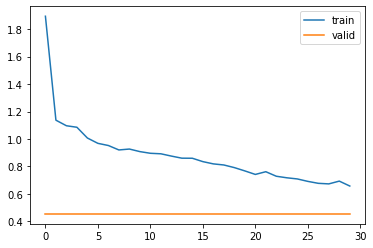

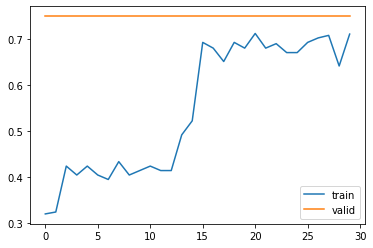

In [0]:
import chainer.links as L
import chainer.functions as F
%matplotlib inline
import matplotlib.pyplot as plt

l = L.Linear(3,2)

from chainer import Sequential

# netとしてインスタンス化
n_input=4
n_hidden=10
n_output = 3

net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)

# 購買法
optimizer = chainer.optimizers.SGD(lr=0.01)
optimizer.setup(net)

# training
n_epoch = 30
n_batchsize = 16

import numpy as np

iteration =0
# ログの保存用
results_train = {
    'loss':[],
    'accuracy':[]
}
results_valid = {
    'loss':[],
    'accuracy':[]
}


for epoch in range(n_epoch):

  # dataset順番を取得
  order = np.random.permutation(range(len(x_train)))
  # 各バッチ毎の目的関数の出力と分類制度の保存用
  loss_list = []
  accuracy_list = []

  for i in range(0,len(order),n_batchsize):
    # バッチを準備
    index = order[i:i+n_batchsize]
    x_train_batch = x_train[index,:]
    t_train_batch = t_train[index]

    # 予測値の出力
    y_train_batch = net(x_train_batch)

    #　目的関数
    loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
    accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)

    loss_list.append(loss_train_batch.array)
    accuracy_list.append(accuracy_train_batch.array)

    # 購買のリセット
    net.cleargrads()
    # 逆伝番
    loss_train_batch.backward()

    #パラメータ
    optimizer.update()

    #カウントアップ
    iteration += 1

  #訓練データに対する目的関数の出力
  loss_train = np.mean(loss_list)
  accuracy_train = np.mean(accuracy_list)

  #予測値を出力
  with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
    # y_val = net(x_val)
    y_test = net(x_test)
  
  #分類練度を計算
  # loss_val = F.softmax_cross_entropy(y_val,t_val)
  # accuracy_val = F.accuracy(y_val,t_val)
  accuracy_test = F.accuracy(y_test, t_test)
  accuracy_test.array

  # 結果の表示
  print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(
  epoch, iteration, loss_train, loss_val.array))

  # ログを保存
  results_train['loss'] .append(loss_train)
  results_train['accuracy'] .append(accuracy_train)
  results_valid['loss'].append(loss_val.array)
  results_valid['accuracy'].append(accuracy_val.array)

plt.plot(results_train['loss'],label='train')
plt.plot(results_valid['loss'],label='valid')
plt.legend()
plt.show()

# 分類精度 (accuracy)
plt.plot(results_train['accuracy'], label='train')  # label で凡例の設定
plt.plot(results_valid['accuracy'], label='valid')  # label で凡例の設定
plt.legend()  # 凡例の表示

chainer.serializers.save_npz('my_iris.net', net)

In [0]:
!ls

my_iris.net  sample_data


In [0]:
loaded_net = Sequential(
    L.Linear(n_input, n_hidden), F.relu,
    L.Linear(n_hidden, n_hidden), F.relu,
    L.Linear(n_hidden, n_output)
)